In [1]:
'''
******Power_2023_80 共80类，每类至少30张，共#张，像素?，训练集56 ，验证集0，测试集24
'''
import os
import sys
import cv2 as cv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import torchvision.transforms as transforms
#CV2  4.1.2可以用绝对地址，新版本只能使用相对路径
data_dir = 'data/Power_2023_80'
dataset_train = "train"
dataset_val = "val"
dataset_test = "test"
cls_train = 56
cls_val = 24
cls_test = 24


In [2]:
#测试用，下面直接写成函数read_lablel()
fname = dataset_train
path = os.path.join(data_dir,fname)
result = []
for dir_item in os.listdir(path):
    fall_path = os.path.abspath(os.path.join(path, dir_item))
    if os.path.isdir(fall_path):
        result.append(dir_item)
        
print(result)
print(len(result))

['electromagnetic_valve', '24Vpower', '57battery', 'AC_contactor', 'air_conditioner_inner', 'alarm_lamp', 'bath_heater', 'battery', 'blowing_machine', 'camera', 'charger', 'communication_cabinet', 'communication_device', 'conditioner_out', 'cutting_machine', 'DC_motor', 'earth_teminal', 'efficient_lightbulb', 'electric_bicycle', 'electric_bowl', 'elec_machine_fan', 'engerymeter', 'fan_switch', 'fire_safety_light', 'floor_fan', 'hair_dryer', 'heavy_breaker', 'heavy_transformer', 'indoor_omnid_antenna', 'industry_robot', 'insulator', 'jinju', 'keyboard', 'microwave_oven', 'mobilephone', 'monitor', 'multimeter', 'oscillograph', 'power_board', 'power_lightning_protection', 'seromotor', 'solar_panel', 'spd', 'spherical_monitor', 'SSR', 'sunlight', 'sweep_robot', 'switchgear', 'switch_pannel', 'taideng', 'teakettle', 'tricoloured_light', 'vertical_airconditioner', 'wall_elec_plate', 'wind_generator', 'wire']
56


In [3]:
def read_lablel(fname):
    result = []
    path = os.path.join(data_dir,fname)
    for dir_item in os.listdir(path):
        fall_path = os.path.abspath(os.path.join(path, dir_item))
        if os.path.isdir(fall_path):
            result.append(dir_item)
    return result

train_lablel=read_lablel(dataset_train)    
print(len(train_lablel))

56


In [4]:
train_label = read_lablel(dataset_train)    
val_label = read_lablel(dataset_val)    
test_label = read_lablel(dataset_test)    
print(len(train_label))
print(len(val_label))
print(len(test_label))

56
24
24


In [5]:
#求类别，并合并label
labels_list = train_label +  test_label 
print('数据集label总数：',len(labels_list))
print(labels_list)
print('train,val交集： ',set(train_label) & set(val_label))
print('train,test交集： ',set(train_label) & set(test_label))
#print('val,test交集： ',set(val_label) & set(test_label))

数据集label总数： 80
['electromagnetic_valve', '24Vpower', '57battery', 'AC_contactor', 'air_conditioner_inner', 'alarm_lamp', 'bath_heater', 'battery', 'blowing_machine', 'camera', 'charger', 'communication_cabinet', 'communication_device', 'conditioner_out', 'cutting_machine', 'DC_motor', 'earth_teminal', 'efficient_lightbulb', 'electric_bicycle', 'electric_bowl', 'elec_machine_fan', 'engerymeter', 'fan_switch', 'fire_safety_light', 'floor_fan', 'hair_dryer', 'heavy_breaker', 'heavy_transformer', 'indoor_omnid_antenna', 'industry_robot', 'insulator', 'jinju', 'keyboard', 'microwave_oven', 'mobilephone', 'monitor', 'multimeter', 'oscillograph', 'power_board', 'power_lightning_protection', 'seromotor', 'solar_panel', 'spd', 'spherical_monitor', 'SSR', 'sunlight', 'sweep_robot', 'switchgear', 'switch_pannel', 'taideng', 'teakettle', 'tricoloured_light', 'vertical_airconditioner', 'wall_elec_plate', 'wind_generator', 'wire', '10kv_elecbin', '48Vpower', 'air_conditioner_outer', 'bushing_current

In [18]:
#将类别转化为数字标号
labels_dict = {}
i = 1
for l in labels_list:
    if l not in labels_dict:
        labels_dict[l] = i
        i = i+1
print(labels_dict)

{'electromagnetic_valve': 1, '24Vpower': 2, '57battery': 3, 'AC_contactor': 4, 'air_conditioner_inner': 5, 'alarm_lamp': 6, 'bath_heater': 7, 'battery': 8, 'blowing_machine': 9, 'camera': 10, 'charger': 11, 'communication_cabinet': 12, 'communication_device': 13, 'conditioner_out': 14, 'cutting_machine': 15, 'DC_motor': 16, 'earth_teminal': 17, 'efficient_lightbulb': 18, 'electric_bicycle': 19, 'electric_bowl': 20, 'elec_machine_fan': 21, 'engerymeter': 22, 'fan_switch': 23, 'fire_safety_light': 24, 'floor_fan': 25, 'hair_dryer': 26, 'heavy_breaker': 27, 'heavy_transformer': 28, 'indoor_omnid_antenna': 29, 'industry_robot': 30, 'insulator': 31, 'jinju': 32, 'keyboard': 33, 'microwave_oven': 34, 'mobilephone': 35, 'monitor': 36, 'multimeter': 37, 'oscillograph': 38, 'power_board': 39, 'power_lightning_protection': 40, 'seromotor': 41, 'solar_panel': 42, 'spd': 43, 'spherical_monitor': 44, 'SSR': 45, 'sunlight': 46, 'sweep_robot': 47, 'switchgear': 48, 'switch_pannel': 49, 'taideng': 50,

In [19]:
#测试读取 图片文件
filepath = os.path.join(data_dir, dataset_train, train_label[0])
images = []
for image_item in os.listdir(filepath):
    images.append(image_item)
print(len(images))
print(images[0])
fall_path = os.path.join(filepath, images[0])
#image = cv.imread(fall_path)#读取图片
#print(image.shape)
image = Image.open(fall_path)
image.show()

32
electromagnetic_valve_014.png


In [20]:
"""
读取图像文件，存入list中
下面直接封装成  get_image(path,_data)函数
"""
images = []
labels = []
i = 0
with tqdm(total=1942) as pbar:
    pbar.set_description('Processing:')
    for fname in train_lablel:
        filepath = os.path.join(data_dir, dataset_train, fname)
        for image_item in os.listdir(filepath):
            fall_path = os.path.join(filepath, image_item)
            image = cv.imread(fall_path)#读取图片
            images.append(image)
            labels.append(labels_dict[fname])
            pbar.update(1)#更新进度条
            i+=1
            if i==1:
                img0=Image.open(fall_path)
                img0.show()
                #print(fname+': '+str(labels_dict[fname]))

print(len(images))
print(set(train_lablel))

Processing:: 100%|██████████| 1942/1942 [00:17<00:00, 109.56it/s]

1942
{'mobilephone', 'vertical_airconditioner', 'engerymeter', 'spherical_monitor', 'communication_device', 'conditioner_out', 'monitor', 'floor_fan', 'keyboard', 'SSR', 'wind_generator', 'power_lightning_protection', 'electromagnetic_valve', '57battery', 'microwave_oven', 'electric_bowl', 'indoor_omnid_antenna', 'sweep_robot', 'solar_panel', 'elec_machine_fan', 'charger', 'hair_dryer', 'blowing_machine', 'oscillograph', 'taideng', 'wire', 'cutting_machine', 'alarm_lamp', 'insulator', 'power_board', 'communication_cabinet', 'earth_teminal', 'seromotor', 'bath_heater', 'sunlight', 'industry_robot', 'efficient_lightbulb', 'heavy_breaker', 'heavy_transformer', 'multimeter', 'air_conditioner_inner', '24Vpower', 'battery', 'tricoloured_light', 'wall_elec_plate', 'switch_pannel', 'fan_switch', 'electric_bicycle', 'switchgear', 'spd', 'camera', 'DC_motor', 'fire_safety_light', 'jinju', 'teakettle', 'AC_contactor'}


In [21]:
print(images[0].shape,labels[0])
#cv.imshow("image label: %s" %labels[0],images[0])

#cv.waitKey(0)

(168, 238, 3) 1


In [22]:
#对应图像小于crop高宽的,筛选出来
def filter(imgs,crop_size):
    return [img for img in imgs if (
        img.shape[0] < crop_size[0] or img.shape[1] < crop_size[1])]

In [23]:
small_image = filter(images,[84,84])
print('小图片数量：',len(small_image))
if len(small_image) > 0:
    print(small_image[0].shape)
    Image.fromarray(small_image[0]).show()
    Image.fromarray(cv.resize(small_image[0],(84,84))).show()

小图片数量： 1
(75, 357, 3)


In [26]:
"""
读取图像文件，存入list中1942,891,891
"""
def get_image(label_data,cls_data,data_set):
    images = []
    labels = []
    crop_size = [84,84]
    with tqdm(total=891) as pbar:
        pbar.set_description('Processing:')
        for fname in label_data:
            filepath = os.path.join(data_dir, data_set, fname)
            for image_item in os.listdir(filepath):
                fall_path = os.path.join(filepath, image_item)
                image = cv.imread(fall_path)#读取图片
                image = cv.resize(image,(84,84))#resize成（84，84）
                images.append(image)
                labels.append(labels_dict[fname])
                pbar.update(1)#更新进度条
    return images, labels

In [30]:
"""
写入.pickle文件
"""
#images, labels = get_image(train_label,cls_train,dataset_train)#替换上面读取的txt数据
#images, labels = get_image(val_label,cls_val,dataset_val)
images, labels = get_image(test_label,cls_test,dataset_test)
images = np.asarray(images,dtype=object)
print(images.shape)
small_image = filter(images,[84,84])
print('小图片数量：',len(small_image))
image_dic = {'data': images, 'labels' : labels}
#train  Power_2023_80_category_split_train_phase_train.pickle
#val  Power_2023_80_category_split_train_phase_val.pickle
#test  Power_2023_80_category_split_test.pickle
with open('Power_2023_80_category_split_test.pickle', 'wb') as f:
    pickle.dump(image_dic, f)
    f.close()

Processing:: 100%|██████████| 891/891 [00:07<00:00, 119.22it/s]


(891, 84, 84, 3)
小图片数量： 0


In [31]:
"""
读取.pickle文件
"""
#path='Power_2023_80_category_split_train_phase_val.pickle'
#path='Power_2023_80_category_split_train_phase_train.pickle'
path='Power_2023_80_category_split_test.pickle'
with open(path,'rb') as f:
    data = pickle.load(f, encoding='bytes')
    imgs = data['data']
    labels = data['labels']
print(len(imgs))
print(imgs[0].shape)
print(type(labels[0]))

891
(84, 84, 3)
<class 'int'>


[57, 57, 57, 57, 57, 57, 57, 57, 57, 57]


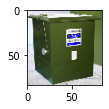

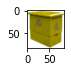

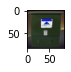

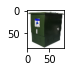

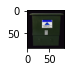

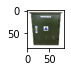

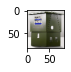

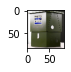

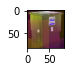

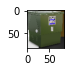

In [32]:
#测试生成的数据正确不
def test(image_dataset,image_label):
    print(image_label[:10])
    plt.figure(figsize=(8,8))
    for i in range(10):
        plt.subplot(5,2,i+1)
        plt.imshow(np.asarray(image_dataset[i]).astype('uint8'))
        plt.show()
    
test(imgs,labels)

In [30]:
item = 0
img = np.asarray(imgs[item]).astype('uint8')
print(len(img))
img = Image.fromarray(img)

img.show()

84


In [25]:
slabels = np.asarray(labels)
print(slabels)
np.min(slabels)
slabels = slabels - np.min(slabels)
numclass = np.max(slabels)+1
print('number of class=',numclass)

[57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 57 57 57 57 58 58 58 58 58 58 58 58 58 58 58 58
 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58 58
 58 58 58 58 58 58 58 58 58 58 58 58 58 58 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60
 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 61 61 61 61 61 61 61
 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61
 61 61 61 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62 62
 62 62 62 62 62 62 62 62 62 62 62 62 62 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 65